# ***JOB DESCRIPTION BASED RESUME MATCHER USING SENTIMENT ANALYSIS, TEXT SUMMARIZATION, KEYWORD EXTRACTION***



---



---


# 1. IMPORT LIBRARIES


---



---





> In this part, we will import all required packages and libraries which we will be using for further computation.



In [2]:
import numpy as nmp 
import pandas as pnd 
import nltk
import matplotlib.pyplot as pl0t
import seaborn as sbns
import re, os, string
import spacy
import warnings
warnings.filterwarnings("ignore")

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sian
from pprint import PrettyPrinter
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In the above code we are importing numpy,pandas,nltk,matplotlib.pyplot,seaborn,spacy,warnings,vander_lexicon,stopwords,punkt and from nltk we are importing word_tokenize, stopwords, porterstemmer,tweettokenizer,sentimentIntensityAnalyzer,prettyprinter and Tfidvectorizer from python library.



---



---


# 2. READ AND PRE-PROCESS DATA


---



---





> In this part, we read the job description dataset using pandas. We then remove unwanted rows and columns. We remove the empty filled rows.



In [3]:
job_dataset = pnd.read_csv('/content/sample_data/monster_com-job_sample.csv')
job_dataset.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In the above part we are reading the "jobdescription.csv" file by "pandas" pnd variable by copying the path of dataset from google drive which we had uploaded in the previous step. 

In [4]:
job_dataset.drop(['country', 'country_code','date_added','has_expired','job_board','job_type','location','organization','page_url','sector'], axis=1)

,job_description,job_title,salary,uniq_id
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,NaN,11d599f229a80023d2f40e7c52cd941e
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,NaN,e4cbb126dabf22159aff90223243ff2a
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,NaN,839106b353877fa3d896ffb9c1fe01c0
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,NaN,58435fcab804439efdcaa7ecca0fd783
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,NaN,64d0272dc8496abfd9523a8df63c184c
...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,"120,000.00 - 160,000.00 $ /yearbonus",a80bc8cc3a90c17eef418963803bc640
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,"45,000.00 - 60,000.00 $ /year",419a3714be2b30a10f628de207d041de
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,NaN,5a590350b73b2cec46b05750a208e345
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,25.00 - 28.00 $ /hour,40161cf61c283af9dc2b0a62947a5f1b


In [5]:
job_dataset = job_dataset[['job_description','uniq_id']].copy()

job_dataset = job_dataset.dropna()

#Lower-case all descriptions
job_dataset.title = job_dataset.job_description.str.lower()

#Remove handlers
job_dataset.title = job_dataset.job_description.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS
job_dataset.desc = job_dataset.job_description.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
job_dataset.desc = job_dataset.job_description.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
job_dataset.desc = job_dataset.job_description.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
job_dataset.desc = job_dataset.job_description.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))



Here we are dropping or removing the special characters,single characters, single space, multiple spaces and handlers etc from the job description dataset as a part of cleaning or preprocessing. 

In [6]:
job_dataset.dropna(subset=['job_description'], inplace=True)

Here we are dropping the null values of "job description" column, which is a part of data preprocessing.



---



---


# 3. SENTIMENT ANALYSIS


---



---





> Here we perform the sentiment analysis on the above job descriptions. We do the lexicon based sentiment analysis , not the machine learning based sentiment analysis as the available dataset does not contain any pre trained data. We use the VaderSentiment for the current task. Also, we use the textblob to do the above task.


> A set of words or phrases and the sentiment scores they correspond with make up VaderSentiment's vocabulary. The scores range from -1 to 1, with a score of 1 representing a strongly favorable feeling and a score of 0 representing a neutral sentiment. Also, the lexicon contains guidelines for dealing with negations, intensifiers, and other linguistic elements that can influence the tone of a document.





In [7]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


In the above step we are installing vadersentimentfrom the python library.

In [8]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
Sent_Analyser = SentimentIntensityAnalyzer()

In the above block of code we are importing SentimentInyensityAnalyzer from vederSentiment and defining the function SentimentIntensityAnalyzer() for the variable Snet_Analyser.

In [9]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = Sent_Analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

Here we are predicting the score for a particular job description sentence by defining polarity_scores in the function.

In [10]:
job_dataset["sentiment"] = job_dataset["job_description"].apply(lambda review: Sent_Analyser.polarity_scores(review))

job_dataset.head()

,job_description,uniq_id,sentiment
0,TeamSoft is seeing an IT Support Specialist to...,11d599f229a80023d2f40e7c52cd941e,"{'neg': 0.009, 'neu': 0.822, 'pos': 0.169, 'co..."
1,The Wisconsin State Journal is seeking a flexi...,e4cbb126dabf22159aff90223243ff2a,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp..."
2,Report this job About the Job DePuy Synthes Co...,839106b353877fa3d896ffb9c1fe01c0,"{'neg': 0.004, 'neu': 0.857, 'pos': 0.139, 'co..."
3,Why Join Altec? If you’re considering a career...,58435fcab804439efdcaa7ecca0fd783,"{'neg': 0.024, 'neu': 0.811, 'pos': 0.164, 'co..."
4,Position ID# 76162 # Positions 1 State CT C...,64d0272dc8496abfd9523a8df63c184c,"{'neg': 0.011, 'neu': 0.875, 'pos': 0.115, 'co..."


Here are diplaying the sentiment analysis that we had performed for the job description dataset which we had uploaded in  the above step.

In [11]:
from textblob import TextBlob

Here we are importing the textblob  from Textblob.

In [12]:
for text in job_dataset["job_description"]:
  if(TextBlob(text).sentiment.polarity>0):
    job_dataset["sentiment_class"]="positive"
  elif(TextBlob(text).sentiment.polarity<0):
    job_dataset["sentiment_class"]="negative"
  else:
    job_dataset["sentiment_class"]="neutral"


Here we are predicting the sentiment polarity for the particular "job description" for the data in the job description dataset.eg, {"positive',"Negative","Neutral"}.

In [13]:
job_dataset.head()

,job_description,uniq_id,sentiment,sentiment_class
0,TeamSoft is seeing an IT Support Specialist to...,11d599f229a80023d2f40e7c52cd941e,"{'neg': 0.009, 'neu': 0.822, 'pos': 0.169, 'co...",positive
1,The Wisconsin State Journal is seeking a flexi...,e4cbb126dabf22159aff90223243ff2a,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...",positive
2,Report this job About the Job DePuy Synthes Co...,839106b353877fa3d896ffb9c1fe01c0,"{'neg': 0.004, 'neu': 0.857, 'pos': 0.139, 'co...",positive
3,Why Join Altec? If you’re considering a career...,58435fcab804439efdcaa7ecca0fd783,"{'neg': 0.024, 'neu': 0.811, 'pos': 0.164, 'co...",positive
4,Position ID# 76162 # Positions 1 State CT C...,64d0272dc8496abfd9523a8df63c184c,"{'neg': 0.011, 'neu': 0.875, 'pos': 0.115, 'co...",positive


Here we are printing the Info about the dataset after performing the sentiment analysis.

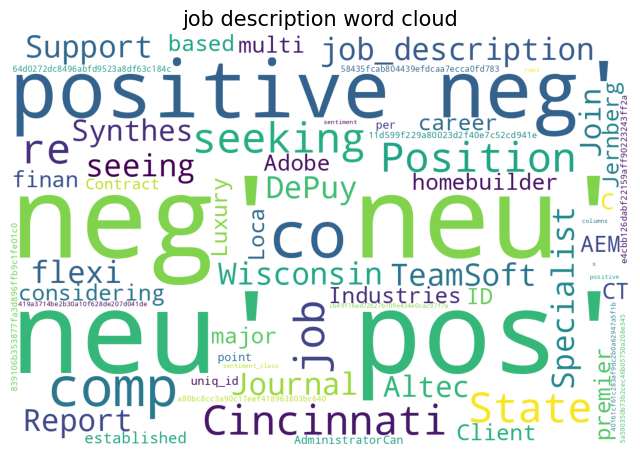

In [14]:
from wordcloud import WordCloud
positive = job_dataset[job_dataset['sentiment']==1]

pl0t.rcParams['figure.figsize']=(8,8)
pl0t.style.use('fast')


wc=WordCloud(background_color='white',width=1200,height=800).generate(str(job_dataset))
pl0t.title('job description word cloud',fontsize=15)
pl0t.imshow(wc)
pl0t.axis('off')
pl0t.show()

Here we are displaying the Visualization of sentiment analysis that we had performed in the above step.

In [15]:
# total number of positive and negative sentiments
l = len(job_dataset[job_dataset['sentiment_class'] == 'negative'])
print(f"negative sentences= {l} ")

m = len(job_dataset[job_dataset['sentiment_class'] == 'positive'])
print(f" positive sentences= {m}")

m = len(job_dataset[job_dataset['sentiment_class'] == 'neutral'])
print(f" neutral sentences= {m}")

negative sentences= 0 
 positive sentences= 22000
 neutral sentences= 0


Here we are predicting the "positive sentences","negative sentences" and "neutral sentences" that are present in the dataset.

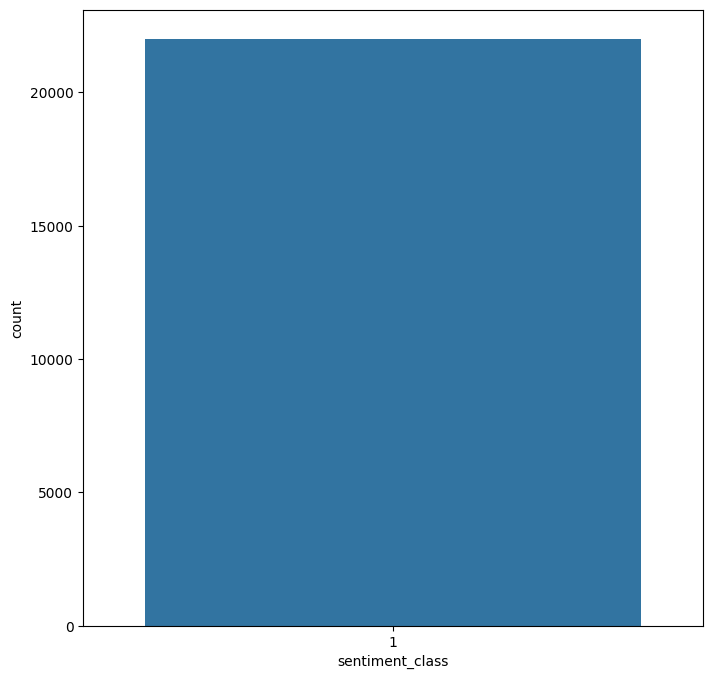

In [16]:
job_dataset['sentiment_class'] = job_dataset['sentiment_class'].map({'positive':1,'negative':-1,'neutral':0},na_action=None)
count = sbns.countplot(data=job_dataset,x='sentiment_class',order=job_dataset['sentiment_class'].value_counts().index)
pl0t.show()

Above graph depicts the Graphical visualzation of "positive sentences" that we had predicted for the dataset. 



---



---


# 4. TEXT SUMMARIZATION


---



---





> In this part, we do the text summarization on the job description dataset. For every job description form the dataset, we extract the brief summary and add it to the dataframe. We create a spacy pipeline and define a summary function.


> Text summarization is a natural language processing (NLP) technique that includes condensing a text while keeping the key points. Text summary aims to provide a condensed version of a text that captures the key ideas and is simpler to read and comprehend.





In [17]:
! pip install pytextrank
import pytextrank #ranking text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In the above code we are installing the pytextrank from the python library.

In [18]:

pp = PrettyPrinter()

Here we are defining prettyprinter() function for pp variable.

In [19]:
job_dataset.info() # infor about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_description  22000 non-null  object
 1   uniq_id          22000 non-null  object
 2   sentiment        22000 non-null  object
 3   sentiment_class  22000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 687.6+ KB


Here we are printing the Information about the Job description about the Job dataset.

In [20]:
# Create spaCy pipeline and add textrank to it
import spacy.cli

spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("textrank")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


Here we are importing the spacy.cli library and downloading "en_core_web_lg" &"en_core_web_lg" corpus data from python library.

In [21]:
def summary_for_article(num,prin=False):
    
    sum = "" # collecting the summary from the generator
    document = nlp(job_dataset.job_description[num]) #apply the pipeline
    
    for i in document._.textrank.summary(limit_phrases=10, limit_sentences=1): #get the summary
        sum+=str(i)
        
    phrases_n_ranks = [ (phrase.chunks[0], phrase.rank) for phrase in document._.phrases] # get important phrases
    
    if prin: 
        print(job_dataset.job_description[num])
        print("\n_______ to ______\n")
        print(sum)
      
        
    return sum

Here we are assigning the ranks for each and every row present in job description dataset after performing the sentiment analysis.

In [22]:
for i in range(0,100):
    print("\n....",i,"")
    #summary_for_article(i,True);
    job_dataset["summary"]=summary_for_article(i,True)


.... 0 
TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:• Call tracking software• Phone based technical support• Problem documentation and communication• Remote Desktop Management Tools• Respond to customer requests• General understanding of LANDesk• Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?• TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!• TeamSoft has been in business since 1996• TeamSoft's owners are local IT professionals 

Here we are printing Text Summary of Job description Dataset as a part of Text Summarization.



---



---


# 5. KEYWORD EXTRACTION FROM RESUME DATASET


---



---





> In this part, we extract the keywords from the resume dataset which is required for the other part of our project. We first read and pre-process our data and then apply different pre-processing functions on the data. We also use TfIdfVectorizer and extract the top keywords from the resume description and then add it to the dataframe.Keyword extraction involves locating the most crucial words or phrases in a text. To help with tasks like document categorization, topic modeling, and information retrieval, keyword extraction aims to identify the major subjects or themes in a document or corpus.



In [23]:
def get_stopwords_list(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stop_words = f.readlines()
        stopwords_set = set(m.strip() for m in stop_words)
        return list(frozenset(stopwords_set))

Here we are removing the stopwords for "resume.csv" dataset which is used as the process of extracting the keywords from the given sample resumes.

In [24]:
def clean_text(text):
    """Doc cleaning"""
    
    # Lowering text
    text = text.lower()
    
    # Removing punctuation
    text = "".join([c for c in text if c not in PUNCTUATION])
    
    # Removing whitespace and newlines
    text = re.sub('\s+',' ',text)
    
    return text

Here we are performing the pre-processing for "Resume.csv" dataset by adding the punctuation as well as converting the text to lower and adding the punctuation to the text present in dataset.

In [25]:
def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

Here we are intializing the features  and functions that are required for extraction of keywords from "resume.csv" dataset.

In [26]:
def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform([doc])
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,TOP_K_KEYWORDS)
    
    return list(keywords.keys())

Here we are extracting the keywords from "Resume.csv" dataset by initializing  Vectorizer funtion to tf_idf_vector variable.

In [27]:
# Constants
PUNCTUATION = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""" 
TOP_K_KEYWORDS = 10 # top k number of keywords to retrieve in a ranked document
STOPWORD_PATH = "/content/sample_data/stopwords.txt"
Resume_PATH = "/content/sample_data/Resume.csv"

Assigning path to each and every and variable such as "Resume_Path"  and " Stopword_Path". 

In [28]:
data = pnd.read_csv(Resume_PATH)
data.drop(["Resume_html"],axis=1)
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


Here we are performing some data mining process such as Cleaning the text of Resume_html for "Resume.csv" Dataset by dropping the data of "Resume_htmL" as a part of cleaned,labelled,punctuated text.

In [29]:
data.dropna(subset=['Resume_str'], inplace=True)

In [30]:
data['Resume_str'] = data['Resume_str'].apply(clean_text)
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,hr administratormarketing associate hr admini...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,hr specialist us hr operations summary versat...,"<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,hr director summary over 20 years experience ...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,hr specialist summary dedicated driven and dy...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,hr manager skill highlights hr skills hr depa...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [34]:
job_dataset["job_description"] = job_dataset["job_description"].apply(clean_text)

In [31]:
corpora = data['Resume_str'].to_list()

Here we are transforming the text of "Resume_str" column to list format. 

In [35]:
corpora2 = job_dataset['job_description'].to_list()

In [37]:
#load a set of stop words
stopwords=get_stopwords_list(STOPWORD_PATH)

# Initializing TF-IDF Vectorizer with stopwords
vector = TfidfVectorizer(stop_words=stopwords, smooth_idf=True, use_idf=True)

# Creating vocab with our corpora
# Exlcluding first 10 docs for testing purpose
vector.fit_transform(corpora[10::])

# Storing vocab
ftr_names = vector.get_feature_names_out()

In [39]:
vector2 = TfidfVectorizer(stop_words=stopwords, smooth_idf=True, use_idf=True)

vector2.fit_transform(corpora2[10::])

# Storing vocab
ftr_names2 = vector2.get_feature_names_out()

Finally we are removing stopwords and null values present in the text of 'Resume.csv" dataset by assigning "stopwords.txt" path to TfidVrctorizer function.

In [41]:

# Storing vocab
ftr_names = vector.get_feature_names_out()
rslt2 = []
for docment in corpora2[0:10]:
    KW_dataset2 = {}
    KW_dataset2['job_descriptions'] = docment
    KW_dataset2['top_keywords'] = get_keywords(vector2, ftr_names2, docment)
    rslt2.append(KW_dataset2)
    
output2 = pnd.DataFrame(rslt2)
output2

,job_descriptions,top_keywords
0,teamsoft is seeing an it support specialist to...,"[teamsoft, consultants, know, madison, charita..."
1,the wisconsin state journal is seeking a flexi...,"[editing, madison, news, journal, threeperson,..."
2,report this job about the job depuy synthes co...,"[training, johnson, synthes, depuy, programs, ..."
3,why join altec if you’re considering a career ...,"[altec, values, engineering, learns, sustain, ..."
4,position id 76162 positions 1 state ct city fa...,"[store, manager, assistant, associates, direct..."
5,job description job 720298apex systems has an ...,"[construction, osp, experience510, sitemust, c..."
6,report this job about the job based in san fra...,"[qa, java, saas, engineer, principal, automate..."
7,responsibilitieskforce has a client seeking a ...,"[timecards, administrative, recurring, appoint..."
8,parttime 430 pm 930 pm mon fri brookdale westl...,"[brookdale, residents, kitchenettes, 1034, gue..."
9,insituform technologies llc an aegion company ...,"[video, pipeline, technologies, rehabilitation..."


In [42]:
rslt = []
for docment in corpora[0:10]:
    KW_dataset = {}
    KW_dataset['Resume_str'] = docment
    KW_dataset['top_keywords'] = get_keywords(vector, ftr_names, docment)
    rslt.append(KW_dataset)
    
output = pnd.DataFrame(rslt)
output

,Resume_str,top_keywords
0,hr administratormarketing associate hr admini...,"[marketing, dec, medical, relations, customer,..."
1,hr specialist us hr operations summary versat...,"[marketing, hr, sharepoint, materials, brochur..."
2,hr director summary over 20 years experience ...,"[hris, friends, hr, kansas, adjutant, topeka, ..."
3,hr specialist summary dedicated driven and dy...,"[call, 10key, touch, customer, hr, comments, w..."
4,hr manager skill highlights hr skills hr depa...,"[hr, employee, human, benefits, jan, compensat..."
5,hr generalist summary dedicated and focused a...,"[nonimmigrant, uscis, petitions, 112008, perfo..."
6,hr manager summary human resources manager ex...,"[hr, training, staff, tesol, development, huma..."
7,hr manager professional summary senior hr pro...,"[employee, benefits, human, employees, resourc..."
8,hr specialist summary possess 15 years of exp...,"[hr, statewide, salary, recruitment, pay, comp..."
9,hr clerk summary translates business vision i...,"[hr, shrm, employee, compensation, administrat..."


In [43]:
merged_df = pnd.DataFrame()
merged_df["job_description"] = KW_dataset2['top_keywords']
merged_df["resume_skills"] = KW_dataset['top_keywords']


In [170]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define two sentences
sentence1 = "The quick brown fox jumps over the lazy dog."
sentence2 = "The brown fox jumps over the lazy dog."

# Convert sentences to vectors using pre-trained word embeddings
# You can use any pre-trained embeddings or train your own
# Here, we're using the pre-trained GloVe embeddings
# Download GloVe embeddings from: https://nlp.stanford.edu/projects/glove/
# Load embeddings into memory as a dictionary with words as keys and vectors as values
embeddings_index = {}
with open('/content/sample_data/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Convert sentences to vectors by averaging the word vectors
def sentence_vector(sentence, embeddings_index):
    words = sentence.split()
    vectors = [embeddings_index[word] for word in words if word in embeddings_index]
    if len(vectors) == 0:
        return np.zeros(100)  # if no words found, return a vector of zeros
    else:
        return np.mean(vectors, axis=0)
def cos_sim(sentence1,sentence2):
  vector1 = sentence_vector(sentence1, embeddings_index)
  vector2 = sentence_vector(sentence2, embeddings_index)
  # Calculate cosine similarity between the two vectors
  similarity = cosine_similarity([vector1, vector2])
  cosine_similarity_value = similarity[0][1]
  return str(round(cosine_similarity_value,2))

#print("Sentence 1:", sentence1)
#print("Sentence 2:", sentence2)
#print("Cosine Similarity:", cos_sim(sentence1,sentence2))

In [47]:
score=[]
for i in range(0,len(merged_df),1):
  score.append(cos_sim(merged_df["job_description"].get(i),merged_df["resume_skills"].get(i)))

In [48]:
merged_df["matching_scores"] = score
merged_df.head()

,job_description,resume_skills,matching_scores
0,video,hr,0.135405
1,pipeline,shrm,-0.011459
2,technologies,employee,0.237536
3,rehabilitation,compensation,0.381884
4,library,administrative,0.327647


Here we are displaying the "Keywords" for each and every resume present in the "resume.csv" dataset  after  cleaning the text of "Resume_str" and "Resume_html" columns.



---



---
# End of Project Increment1


---



---





---



---
#Project Increment2


---



---





---



---
# Labels Classification


---



---



The data contains a pair of paragraphs. These text paragraphs are randomly sampled from a raw dataset. Each pair of the sentence may or may not be semantically similar. The dataset considered for this project does not contain any labels. Given below is the solution to the unsupervised machine learning problem

In [307]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import re
import scipy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec, KeyedVectors, FastText
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Flatten, SimpleRNN, RNN,GRU, SpatialDropout1D, Dropout
#from keras.preprocessing.sequence import pad_sequences


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [308]:
data = pd.read_csv('/content/sample_data/nlp_test.csv')
data.shape #(4023,3)

X = data.iloc[:,:].values
s1 = data["job_description"]
s2 =  data["resume_skills"]


# Preprocessing of Data

In [309]:
import nltk
nltk.download('punkt')
tokens1 = []
tokens2 = []
tokens1 = [word_tokenize(str(sentence)) for sentence in s1]
tokens2 = [word_tokenize(str(sentence)) for sentence in s2]

rm1 = []
for w in tokens1:
    sm = re.sub('[^A-Za-z]',' ', str(w))
    x = re.split("\s", sm)
    rm1.append(x)
    
rm2 = []
for w in tokens2:
    sm2 = re.sub('[^A-Za-z]',' ',str(w))
    x2 = re.split("/s",sm2)
    rm2.append(x2)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [310]:
#Removing whitespaces    
for sent in rm1:
    while '' in sent:
        sent.remove('')

for sent in rm2:
    while '' in sent:
        sent.remove('')
        
# Lowercasing
low1 = []
for i in rm1:
    i = [x.lower() for x in i]
    low1.append(i)

low2 = []
for i in rm2:
    i = [x.lower() for x in i]
    low2.append(i)


In [311]:
#Lemmatozation
import nltk
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
lemma1 = []
wnl = WordNetLemmatizer()
for sent in low1:
    tokens = [wnl.lemmatize(w) for w in sent]
    lemma1.append(tokens)
    
lemma2 = []
for sent in low2:
    tok = [wnl.lemmatize(se) for se in sent]
    lemma2.append(tok)
    
# Removing Stopwords
filter_words1 = []
Stopwords = set(stopwords.words('english'))

for sent in lemma1:
    tokens = [w for w in sent if w not in Stopwords]
    filter_words1.append(tokens)
    
filter_words2 = []
for sent in lemma2:
    tokens2 = [w for w in sent if w not in Stopwords]
    filter_words2.append(tokens2)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Label Classification on Job description Dataset


In [312]:
train_df=pd.read_csv('/content/sample_data/monster_com-job_sample.csv')
train_df.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In [313]:
data=pd.read_csv('/content/sample_data/monster_com-job_sample.csv')


In [314]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [315]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for text processing
from dateutil import parser
import string
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from spacy.lang.en.stop_words import STOP_WORDS

from gensim.models import KeyedVectors

## for language detection
## warnings !!
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [316]:
train=pd.read_csv('/content/sample_data/monster_com_job_sample.csv')

In [317]:
train = train.head(2000)
train.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,The Help Desk Engineer is responsible for deve...,Help Desk Engineer Job in Lompoc,Full Time Employee,"Lompoc, CA",Government and Military,http://jobview.monster.com/Help-Desk-Engineer-...,NaN,IT/Software Development,aa5ef4ee2a4b11a144f284a4fb6ede4f
1,United States of America,US,NaN,No,jobs.monster.com,Are your SharePoint skills matched only by you...,Sr. SharePoint Business Analyst Job in Wabash,Full Time Temporary/Contract/Project,Sr. SharePoint Business Analyst,"Wabash, IN 46992",http://jobview.monster.com/Sr-SharePoint-Busin...,NaN,IT/Software Development,14e4b981bcf3b7f29f80b90571356333
2,United States of America,US,NaN,No,jobs.monster.com,You will work with the latest and greatest tec...,Systems Architect Job in Westlake,"Full Time, Employee","Westlake, TX",Computer/IT Services,http://jobview.monster.com/Systems-Architect-J...,NaN,IT/Software Development,916b96729a7b966dc7fd2f0d041d3d1e
3,United States of America,US,NaN,No,jobs.monster.com,Experis supports a Fortune 100 company with an...,Custom Automation Test Specialist Job in Shava...,Full Time Temporary/Contract/Project,Custom Automation Test Specialist,"Shavano Park, TX",http://jobview.monster.com/Custom-Automation-T...,NaN,IT/Software Development,617fe9977a16ade6aae8fbad3f8b3436
4,United States of America,US,NaN,No,jobs.monster.com,"Greetings,A Business Analyst with knowledge of...",RM BA with KDB expereince in Rates Job in Manh...,Full Time Temporary/Contract/Project,RM BA with KDB expereince in Rates,"Manhattan, NY",http://jobview.monster.com/RM-BA-with-KDB-expe...,NaN,IT/Software Development,022de87289ee7db309f365ba31b0f3ef


In [318]:
final_data = train.drop_duplicates(subset={"job_description","job_title","job_type","sector"})
final_data.head(2000)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,The Help Desk Engineer is responsible for deve...,Help Desk Engineer Job in Lompoc,Full Time Employee,"Lompoc, CA",Government and Military,http://jobview.monster.com/Help-Desk-Engineer-...,NaN,IT/Software Development,aa5ef4ee2a4b11a144f284a4fb6ede4f
1,United States of America,US,NaN,No,jobs.monster.com,Are your SharePoint skills matched only by you...,Sr. SharePoint Business Analyst Job in Wabash,Full Time Temporary/Contract/Project,Sr. SharePoint Business Analyst,"Wabash, IN 46992",http://jobview.monster.com/Sr-SharePoint-Busin...,NaN,IT/Software Development,14e4b981bcf3b7f29f80b90571356333
2,United States of America,US,NaN,No,jobs.monster.com,You will work with the latest and greatest tec...,Systems Architect Job in Westlake,"Full Time, Employee","Westlake, TX",Computer/IT Services,http://jobview.monster.com/Systems-Architect-J...,NaN,IT/Software Development,916b96729a7b966dc7fd2f0d041d3d1e
3,United States of America,US,NaN,No,jobs.monster.com,Experis supports a Fortune 100 company with an...,Custom Automation Test Specialist Job in Shava...,Full Time Temporary/Contract/Project,Custom Automation Test Specialist,"Shavano Park, TX",http://jobview.monster.com/Custom-Automation-T...,NaN,IT/Software Development,617fe9977a16ade6aae8fbad3f8b3436
4,United States of America,US,NaN,No,jobs.monster.com,"Greetings,A Business Analyst with knowledge of...",RM BA with KDB expereince in Rates Job in Manh...,Full Time Temporary/Contract/Project,RM BA with KDB expereince in Rates,"Manhattan, NY",http://jobview.monster.com/RM-BA-with-KDB-expe...,NaN,IT/Software Development,022de87289ee7db309f365ba31b0f3ef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,United States of America,US,NaN,No,jobs.monster.com,Description Northrop Grumman is seeking a So...,Software Engineer Job in Cincinnati,Full Time Employee,"Cincinnati, OH",NaN,http://jobview.monster.com/Software-Engineer-3...,NaN,IT/Software Development,7f70f2c73a2188dffb05b20e8a0c6ca0
571,United States of America,US,NaN,No,jobs.monster.com,What is this job about? Good question. Plain &...,SDLC Project Manager Job in Cincinnati,Full Time Employee,"Cincinnati, OH 45246",NaN,http://jobview.monster.com/SDLC-Project-Manage...,50.00 - 55.00 $ /hour,IT/Software Development,8b427f8ea3a50a11cdf0385c3bc3d49c
572,United States of America,US,NaN,No,jobs.monster.com,What is this job about? Good question. It's a...,Linux Server Engineer Job in Cincinnati,Full Time Employee,"Cincinnati, OH 45242",NaN,http://jobview.monster.com/Linux-Server-Engine...,"75,000.00 - 95,000.00 $ /year",IT/Software Development,a2cc023e4a577da537d6221e11e6cd2d
573,United States of America,US,NaN,No,jobs.monster.com,"Live IT Up at Ciber At Ciber, we believe the m...",Infor / Lawson HCM Consultant Job in Chicago,"Full Time, Employee","Chicago, IL 60601",NaN,http://jobview.monster.com/Infor-Lawson-HCM-Co...,NaN,IT/Software Development,15854dd517ede02d5810862723ab2c92


In [319]:
data_without_missing_values = final_data.dropna(axis=1)

In [320]:
df = final_data.dropna(subset=['job_type'])

In [321]:
df = final_data.dropna(subset=['sector'])

In [322]:
data_without_missing_values.isnull().sum()

country            0
country_code       0
has_expired        0
job_board          0
job_description    0
job_title          0
location           0
page_url           0
sector             0
uniq_id            0
dtype: int64

In [323]:
data_without_missing_values['job_description']

0      The Help Desk Engineer is responsible for deve...
1      Are your SharePoint skills matched only by you...
2      You will work with the latest and greatest tec...
3      Experis supports a Fortune 100 company with an...
4      Greetings,A Business Analyst with knowledge of...
                             ...                        
570    Description   Northrop Grumman is seeking a So...
571    What is this job about? Good question. Plain &...
572     What is this job about? Good question. It's a...
573    Live IT Up at Ciber At Ciber, we believe the m...
575    The Package Development Engineering Contractor...
Name: job_description, Length: 563, dtype: object

In [324]:
df['organization']

0                                Government and Military
1                                       Wabash, IN 46992
2                                   Computer/IT Services
3                                       Shavano Park, TX
4                                          Manhattan, NY
                             ...                        
570                                                  NaN
571                                                  NaN
572                                                  NaN
573                                                  NaN
575    Industrial/Manufacturing EngineeringGeneral/Ot...
Name: organization, Length: 563, dtype: object

In [325]:
df['job_type']

0                        Full Time Employee
1      Full Time Temporary/Contract/Project
2                       Full Time, Employee
3      Full Time Temporary/Contract/Project
4      Full Time Temporary/Contract/Project
                       ...                 
570                      Full Time Employee
571                      Full Time Employee
572                      Full Time Employee
573                     Full Time, Employee
575                      Full Time Employee
Name: job_type, Length: 563, dtype: object

In [326]:
df['sector']

0      IT/Software Development
1      IT/Software Development
2      IT/Software Development
3      IT/Software Development
4      IT/Software Development
                ...           
570    IT/Software Development
571    IT/Software Development
572    IT/Software Development
573    IT/Software Development
575                Engineering
Name: sector, Length: 563, dtype: object

Class counts for Job_type : 
 Full Time Employee                        190
Full Time, Employee                       161
Full Time Temporary/Contract/Project      120
Full Time, Temporary/Contract/Project      40
Full Time                                  35
Full Time , Employee                        5
Full Time , Temporary/Contract/Project      3
Part Time Employee                          2
Employee                                    1
Full Time / Temporary/Contract/Project      1
Part Time, Intern                           1
Full Time / Employee                        1
Full Time Intern                            1
Name: job_type, dtype: int64


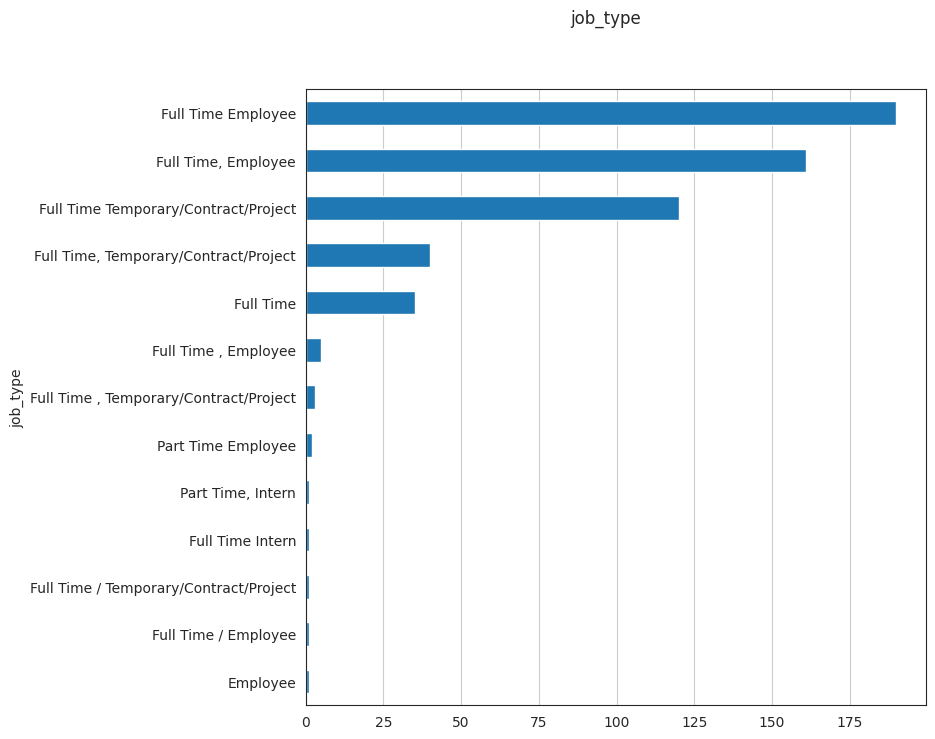

In [327]:
print('Class counts for Job_type : \n',df['job_type'].value_counts())

fig, ax = plt.subplots()
fig.suptitle('job_type', fontsize=12)
df['job_type'].reset_index().groupby('job_type').count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

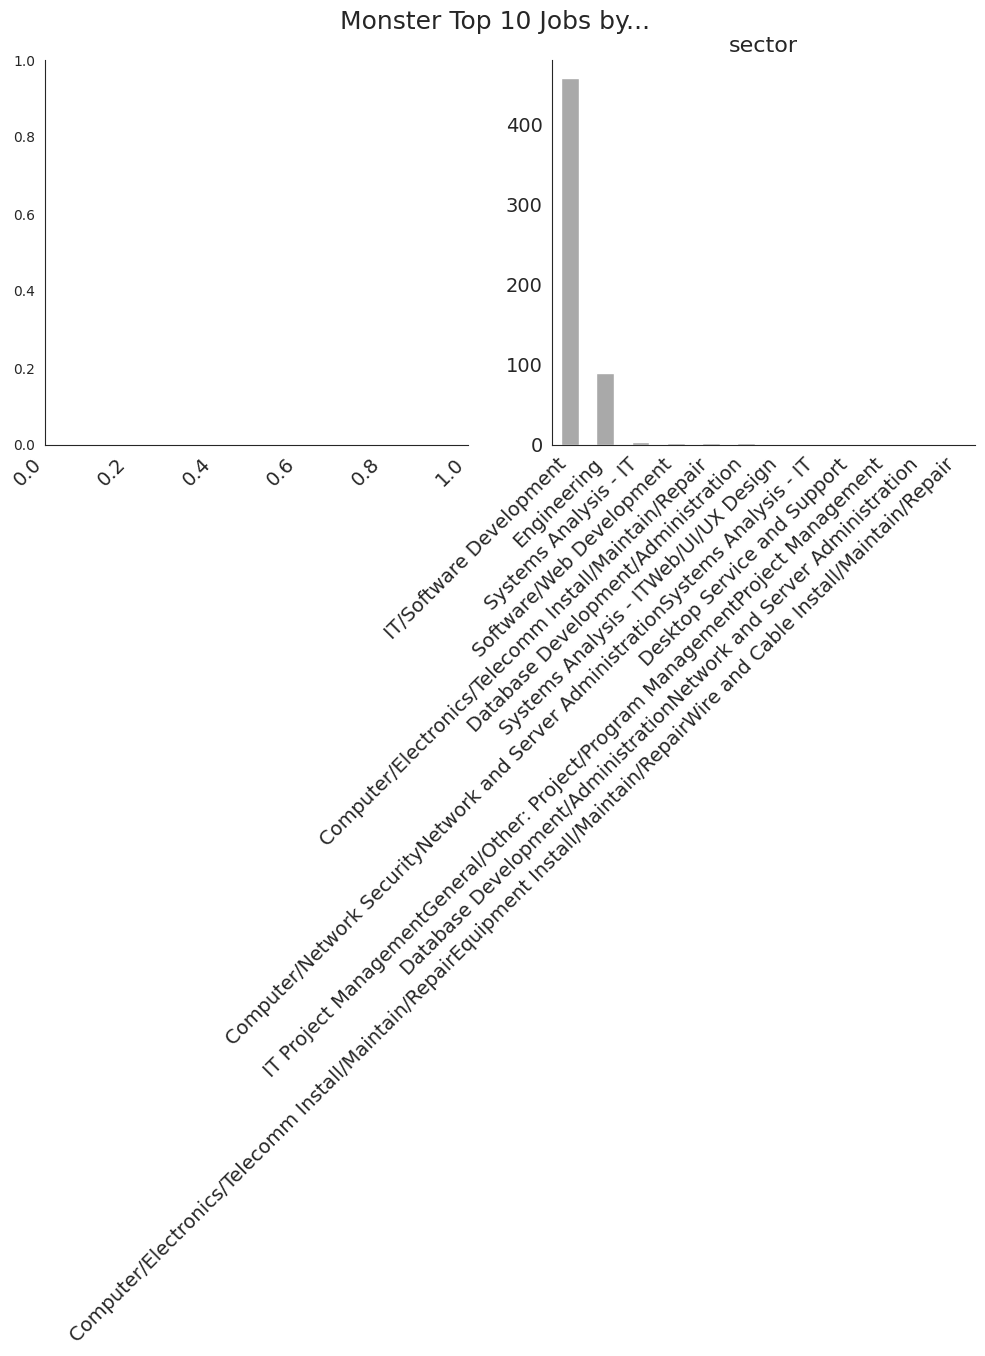

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

f, axarr = plt.subplots(1, 2, figsize=(12, 5))
f.subplots_adjust(hspace=1)
plt.suptitle('Monster Top 10 Jobs by...', fontsize=18)

bar_kwargs = {'fontsize': 14, 'color': 'darkgray'}

df['sector'].value_counts().head(100).plot.bar(ax=axarr[1], **bar_kwargs,
                                                         title='sector')

sns.despine()

for n in [0, 1]:
    axarr[n].title.set_fontsize(16)
    axarr[n].set_xticklabels(axarr[n].get_xticklabels(), 
                             rotation=45, ha='right', fontsize=14)

Class counts for sector : 
 IT/Software Development                                                                                                         458
Engineering                                                                                                                      90
Systems Analysis - IT                                                                                                             3
Software/Web Development                                                                                                          2
Computer/Electronics/Telecomm Install/Maintain/Repair                                                                             2
Database Development/Administration                                                                                               2
Systems Analysis - ITWeb/UI/UX Design                                                                                             1
Computer/Network SecurityNetwork and Server Admi

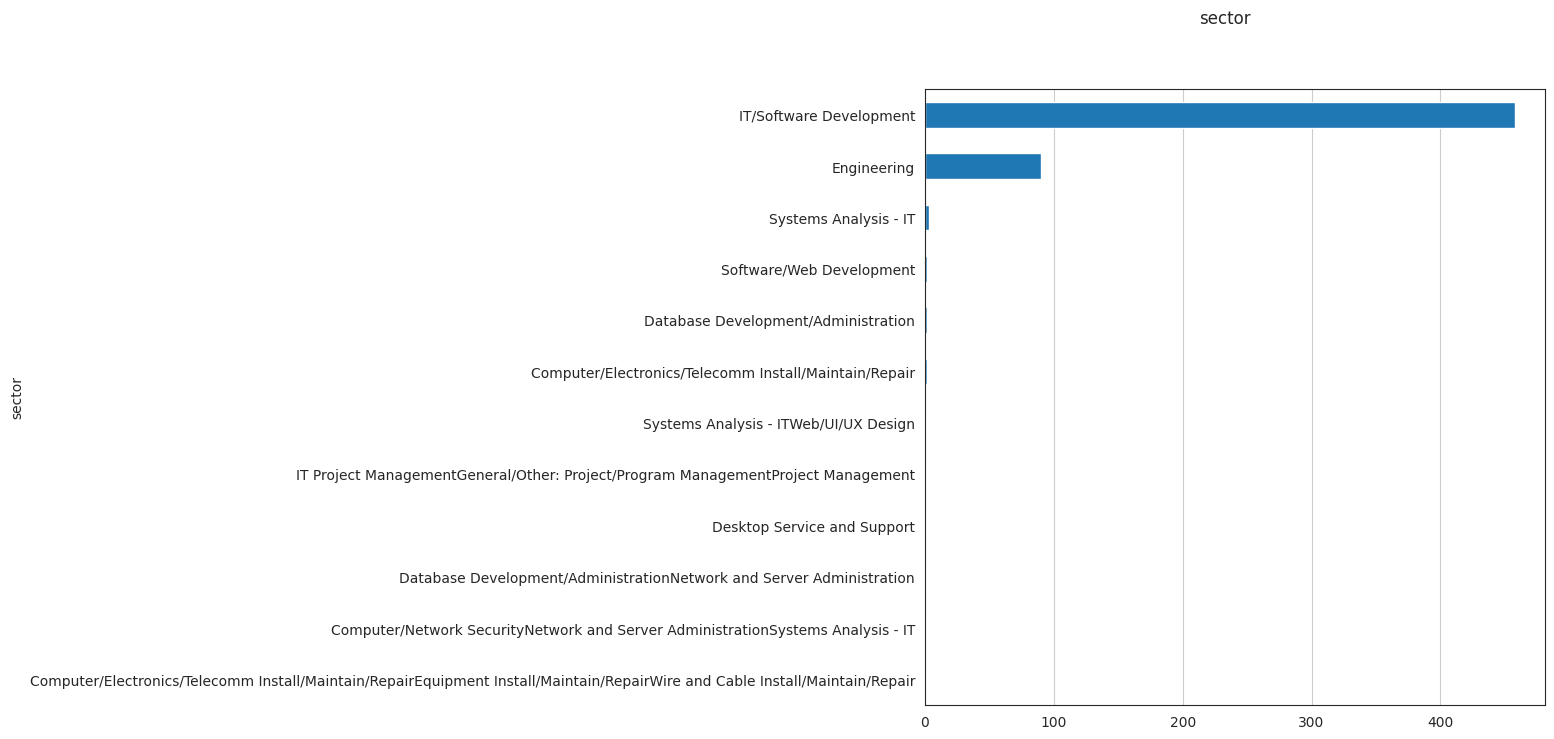

In [329]:
print('Class counts for sector : \n',df['sector'].value_counts())

fig, ax = plt.subplots()
fig.suptitle('sector', fontsize=12)
df['sector'].reset_index().groupby('sector').count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')        
plt.show()

# New Section

Machine Learning model for Multi label classification

**Logistic Regression**

In [330]:
# Import the required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/sample_data/monster_com_job_sample.csv')


final_data = train.drop_duplicates(subset={"job_description","job_title","job_type","sector"})
data_values = final_data.dropna(axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_values['job_description'], data_values['sector'], test_size=0.2)

# Convert the job descriptions into bag-of-words vectors
vectorizer = CountVectorizer(stop_words='english')
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Reshape the target variable to have multiple dimensions
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Train the model using Logistic Regression
lr = LogisticRegression(solver='lbfgs')
clf = MultiOutputClassifier(lr)
clf.fit(X_train_vectors, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test_vectors)
print("job description",X_test)
print("prediction",y_pred)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


job description 349    Database SpecialistDatabase SpecialistOur clie...
507    RPS Klotz Associates is hiring a Project Engin...
126    Requisition Number 37893BR Title Tooling Engin...
476    Our client is currently seeking a Mobile Devel...
518    IT-Senior Telecommunications Engineer Descript...
                             ...                        
411    Desktop Support Temp, Yerba Buena Center for t...
274    Company Description:  World IT Solutions rapid...
332    Senior Backup Support TechnicianSenior Backup ...
457    Our client is one of the largest not-for-profi...
175    Our client in Madison, WI is looking to add a ...
Name: job_description, Length: 113, dtype: object
prediction [['IT/Software Development']
 ['Engineering']
 ['Engineering']
 ['IT/Software Development']
 ['IT/Software Development']
 ['IT/Software Development']
 ['IT/Software Development']
 ['IT/Software Development']
 ['IT/Software Development']
 ['Engineering']
 ['IT/Software Development']
 ['IT/Softwar

In [331]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score
print("Recall score", recall_score(y_test, y_pred, average='macro'))
print("Precision score", precision_score(y_test, y_pred, average='macro'))
print("F1_score", f1_score(y_test, y_pred, average='macro'))

Recall score 0.3157894736842105
Precision score 0.3764705882352941
F1_score 0.33416666666666667


Navie Bayes Classifier

In [332]:
# Import the required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
data = pd.read_csv('/content/sample_data/monster_com_job_sample.csv')


final_data = train.drop_duplicates(subset={"job_description","job_title","job_type","sector"})
data_values = final_data.dropna(axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_values['job_description'], data_values['sector'], test_size=0.2)

# Convert the job descriptions into bag-of-words vectors
vectorizer = CountVectorizer(stop_words='english')
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Reshape the target labels to have two dimensions
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Train the model using Naive Bayes classification
nb = MultinomialNB()
clf = MultiOutputClassifier(nb)
clf.fit(X_train_vectors, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test_vectors)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the values of X_test and y_pred
print("X_test:", X_test)
print("y_pred:",y_pred)



Accuracy: 0.911504424778761
X_test: 410    Geeks on Site is a South Florida based company...
193    VMWare and Windows Server administrator who ha...
219    Schaeffler, a global automotive and industrial...
260    Job ID: 258262 Contract Length: 6 months Face ...
60     Our client is currently seeking a GLOBAL INSTR...
                             ...                        
283    We are looking for a Facets Developer in San F...
344    Tech Support EngineerTech Support EngineerCons...
349    Database SpecialistDatabase SpecialistOur clie...
54      Data Center support Opportunities   We have a...
523    The Judge Group is currently in search of a Ex...
Name: job_description, Length: 113, dtype: object
y_pred: [['IT/Software Development']
 ['IT/Software Development']
 ['Engineering']
 ['IT/Software Development']
 ['IT/Software Development']
 ['IT/Software Development']
 ['IT/Software Development']
 ['IT/Software Development']
 ['IT/Software Development']
 ['Engineering']
 ['Engineerin

In [333]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score
print("Recall score", recall_score(y_test, y_pred, average='macro'))
print("Precision score", precision_score(y_test, y_pred, average='macro'))
print("F1_score", f1_score(y_test, y_pred, average='macro'))

Recall score 0.36363636363636365
Precision score 0.35188405797101446
F1_score 0.35765293383270913




---



---
# Similarity Score Generator using Cosine Similarity


---



---



For this purpose, we have extracted the IT and software related job descriptions from our datasets and comparing it with IT or software related skillset.

In [334]:
IT_jobs= pnd.read_csv('/content/sample_data/nlp_test.csv')

In [335]:
len(IT_jobs)

10000

In [336]:
IT_jobs=IT_jobs.dropna(how="any")
len(IT_jobs)

819

Extracting Keywords from resume_skills

In [337]:
IT_jobs["resume_skills"]= IT_jobs["resume_skills"].apply(clean_text)
corp=IT_jobs["resume_skills"].to_list()
#load a set of stop words
stopwords=get_stopwords_list(STOPWORD_PATH)

# Initializing TF-IDF Vectorizer with stopwords
vec = TfidfVectorizer(stop_words=stopwords, smooth_idf=True, use_idf=True)

# Creating vocab with our corpora
# Exlcluding first 10 docs for testing purpose
vec.fit_transform(corp)

# Storing vocab
names = vec.get_feature_names_out()
rsl = []
for docment in corp:
    KW_dataset2 = {}
    KW_dataset2['resume_skills'] = docment
    KW_dataset2['top_keywords'] = get_keywords(vec, names, docment)
    rsl.append(KW_dataset2)
    
output2 = pnd.DataFrame(rsl)
output2

,resume_skills,top_keywords
0,programming experience using c c or java are p...,"[preferredyou, methodologies, buildâ, passiona..."
1,building new product features across the back ...,"[end, javascriptproject, back, front, features..."
2,yammerthe social network for workplaceis hirin...,"[yammerthe, workplaceis, generation, social, n..."
3,youll be expected to deliver in an agile envir...,"[bringing, class, breaking, expected, agile, p..."
4,comfortable developing in python or similarit ...,"[similarit, serveâ, reducing, investment, flex..."
...,...,...
814,currently enrolled in school majoring in compu...,"[majoring, completed, preference, given, enrol..."
815,we are looking for a developer to join our tea...,"[officejob, casualdemonstrated, unreal, engine..."
816,bachelorâ€™s in computer science or similar 2 ...,"[javascriptâ, bachelorâ, hands, technologies, ..."
817,experience in our current technologies a bonus...,"[dynamodbcassandra, mysqlpostgresqlredshift, k..."


In [338]:
score=[]
for i in range(0,len(IT_jobs),1):
  score.append(cos_sim(IT_jobs["job_description"].get(i),IT_jobs["resume_skills"].get(i)))

In [339]:
IT_jobs["matching_scores"] = score
IT_jobs.head(10)

,job_description,resume_skills,matching_scores
0,The Help Desk Engineer is responsible for deve...,programming experience using c c or java are p...,0.95
1,Are your SharePoint skills matched only by you...,building new product features across the back ...,0.95
2,You will work with the latest and greatest tec...,yammerthe social network for workplaceis hirin...,0.97
3,Experis supports a Fortune 100 company with an...,youll be expected to deliver in an agile envir...,0.96
4,"Greetings,A Business Analyst with knowledge of...",comfortable developing in python or similarit ...,0.96
5,"Job Description:As an IT Support Technician, y...",3 to maintain the existing project and resolvi...,0.97
6,Job Description:-Client is seeking a Director ...,java server side web frameworks springmvc stru...,0.93
7,The Data Analyst is primarily responsible for ...,solid experience working with or familiarity a...,0.93
8,Â The OpportunityÂ Â Cognizantâ€™s Analytic...,essential criteria â€¢ bachelorâ€™s degree pre...,0.95
9,Technical Writer â€“ PLM SoftwareÂ Responsibil...,san francisco applicants pursuant to the san f...,0.87


In [340]:
len(IT_jobs)

819

In [341]:
IT_jobs.isna().sum()

job_description    0
resume_skills      0
matching_scores    0
dtype: int64



---



---
# Training Models to predict scores


---



---



In [342]:
# Importing the libraries
# Cleaning the texts
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

corpus = []

for i in range(0, 819):
    review = re.sub('[^a-zA-Z]', ' ', IT_jobs["job_description"][i]+IT_jobs["resume_skills"][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
 
#print(corpus[0:200])
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 577)
X = cv.fit_transform(corpus).toarray()

y = IT_jobs['matching_scores'].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,mean_absolute_error

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Naive Bayes is : ")
print(cm)

print('Precision: %.3f' % precision_score(y_test, y_pred,pos_label='positive',average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred,pos_label='positive',average='micro'))
                                          
print('F1: %.3f' % f1_score(y_test, y_pred,pos_label='positive',average='macro'))
                                          
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
                                          

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

# Predicting the Test set results
y_predL = classifier1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predL)
print("Confusion matrix for Logistic regression is : ")
print(cm1)
print('Precision: ' % precision_score(y_test, y_predL,pos_label='positive',average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_predL,pos_label='positive',average='micro'))
print('F1: %.3f' % f1_score(y_test, y_predL,pos_label='positive',average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predL))

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_predD = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_predD)
print("Confusion matrix for Decision tree is is : ")
print(cm2)
print('Precision: %.3f' % precision_score(y_test, y_predD,pos_label='positive',average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_predD,pos_label='positive',average='micro'))
print('F1: %.3f' % f1_score(y_test, y_predD,pos_label='positive',average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predD))



Confusion matrix for Naive Bayes is : 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 3 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 4 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 1 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 2 2 2 4 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 4 5 1 3 2 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 4 2 2 5 2 1 6 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 5 1 3 2 3 2 2 3 1 1]
 [0 0 0 0 0 0 0 0 0 0

Naive Bayes:
The objective of text classification is to categorize or classify a certain text document using a predetermined label. The method use Bayes' theorem to determine, given a text's features—typically the existence or absence of specific words or phrases in the document—the likelihood that the document falls under a given category.
This is referred to be "naive" since it implies that all features are independent of one another. This presumption makes the computations easier and increases the computational efficiency of the method.
A set of labeled training data is utilized to estimate the probabilities of each feature given each category in order to train the Naive Bayes classifier. The posterior probability of a document belonging to a specific category given its attributes is then calculated using these probabilities.




---

Logistic Regression:
The objective of text classification is to categorize or classify a certain text document using a predetermined label. The binary classification algorithm type of logistic regression is used to categorize documents into one of two groups. For instance, "positive" or "negative" categories may be used in sentiment analysis.

The logistic regression algorithm calculates the likelihood that a document falls into a specific category. A logistic function, which converts any input value to a number between 0 and 1, is used to model this likelihood. A sigmoid function is another name for the logistic function.
A set of labeled training data is utilized to estimate the logistic function's parameters and train the logistic regression classifier. Usually, these parameters are discovered by the use of an optimization process like gradient descent.

For applications like sentiment analysis, where the objective is to categorize text as positive or negative, logistic regression can be utilized in NLP. The technique can also be used for named entity recognition, which aims to locate and categorize named entities in text documents, such as persons, businesses, and locations.


---


Decision tree:
In decision tree regression, rather than predicting a discrete category or label for a given input, the objective is to predict a continuous value. In sentiment analysis, for instance, the objective can be to forecast a sentiment score between 0 and 1 for a specific text piece.

A collection of labeled training data is used to build a tree that minimizes the error between the predicted and actual values in order to train a decision tree regression model. Recursively dividing the data into subsets according to the value of a predetermined characteristic results in the construction of the tree.
The method selects the feature at each node that, when assessed by a loss function like mean squared error or mean absolute error, results in the greatest reduction in error. Until a stopping criterion is satisfied, such as reaching a maximum depth or a minimum number of samples at a leaf node, this process is continued.

When performing tasks like sentiment analysis, where the objective is to forecast a sentiment score for a given text document, decision tree regression can be used. The technique can also be used to forecast the amount of words or characters in a document, among other regression-based NLP tasks.


---
Random Forest:
A prediction is made using a variety of decision trees using the ensemble learning technique known as random forest regression. It creates a final forecast by combining the predictions of various decision trees that were built using different random subsets of the training data.
A forest of decision trees is built using a collection of labeled training data in order to train a random forest regression model. As in decision tree regression, each tree is built by recursively dividing the data into subsets based on the value of a selected feature.
However, in random forest regression, the algorithm builds numerous trees on various subsets of the data, choosing a different subset of features each time. This enhances the generalization of the model and lessens overfitting.
The program aggregates all of the forest's predictions to produce a prediction using the random forest regression model. This can be accomplished simply averaging the forecasts and taking the mean or median, or by employing a more complicated technique like weighted averaging.

For NLP applications like sentiment analysis, where the objective is to forecast a sentiment score for a certain text document, random forest regression can be employed. The technique can also be used to forecast the amount of words or characters in a document, among other regression-based NLP tasks.


In [343]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_predR = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_predR)
print("Confusion matrix for Random Forest  is : ")
print(cm3)
print('Precision: %.3f' % precision_score(y_test, y_predR,pos_label='positive',average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_predR,pos_label='positive',average='micro'))
print('F1: %.3f' % f1_score(y_test, y_predR,pos_label='positive',average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predR))

Confusion matrix for Random Forest  is : 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 3 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 2 1 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 2 2 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 3 3 2 6 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 2 3 6 5 2 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2

We are getting under-fitting and the metric values similar which can be bacuase of following reasons:
our model learned very fast. In this case, we need to increase the dataset by adding some data or augmentations
our loss function does not work correctly and returns zero gradients every call


https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/

Calculate metrics globally by counting the total true positives, false negatives and false positives.

According to the documentation this behaviour is correct:

Note that for “micro”-averaging in a multiclass setting with all labels included will produce equal precision, recall and F, while “weighted” averaging may produce an F-score that is not between precision and recall.

TP is the amount of samples that were predicted to have the correct label. In this example, TP = 4 (all green cells)
FP is the amount of labels that got a “vote” but shouldn’t. For example, in the first column, 1 should have been predicted, but 2 was predicted. So there is a false positive for class 2 in this case. On the other hand, if the prediction is right (column 2), there is no FP counted. In this example, FP = 5 (all red cells)
FN is the amount of labels that should have been predicted, but weren’t. Look at the first column again. 1 should have been predicted, but wasn’t. So there is a FN for class 1 in this case. As in the FP case, there is no FN counted if the prediction is correct (column 2). In this example, FP = 5 (all red cells)

In other words, if there is a false positive, there will always also be a false negative and vice versa, because always one class if predicted. If class A is predicted and the true label is B, then there is a FP for A and a FN for B. If the prediction is correct, i.e. class A is predicted and A is also the true label, denn there is neither a false positive nor a false negative but only a true positive. So there is no possibility that would increase only FP or FN but not both. That is why precision and recall are always the same when using the micro averaging scheme.

Note that the explanation above is only true when using micro averaging! When using macro averaging, the implementation is working as follows (source: sklearn documentation):

Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

In this case, for each class 1,2,3 the values for precision, recall and F1 score are calculated separately and then averaged regardless of their occurrence ratio in the dataset. So if two classes only occur 1% each and the third class occurs 98% and the bigger class is always predicted correctly but the smaller often wrong, then the F1 score would still be very bad while it would be good with micro averaging or weighted averaging.

When using weighted averaging, the occurrence ratio would also be considered in the calculation, so in that case the F1 score would be very high (as only 2% of the samples are predicted mainly wrong). It always depends on your use case what you should choose. If the smaller classes are very important, then probably the weighted approach would be a bad choice and you should go for macro averaging.